<a href="https://colab.research.google.com/github/raviyadav44/Brillect-PML-Internship/blob/main/Prediction_using_stocker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U quandl numpy pandas fbprophet matplotlib pytrends pystan

In [19]:
from stocker import Stocker

In [20]:
amazon = Stocker('AMZN')


AMZN Stocker Initialized. Data covers 1997-05-16 00:00:00 to 2018-03-27 00:00:00.


In [4]:
stock_history = amazon.stock
stock_history.head()

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,ds,y,Daily Change
0,1997-05-16,22.38,23.75,20.50,20.75,1225000.0,0.0,1.0,1.865000,1.979167,1.708333,1.729167,14700000.0,1997-05-16,1.729167,-0.135833
1,1997-05-19,20.50,21.25,19.50,20.50,508900.0,0.0,1.0,1.708333,1.770833,1.625000,1.708333,6106800.0,1997-05-19,1.708333,0.000000
2,1997-05-20,20.75,21.00,19.63,19.63,455600.0,0.0,1.0,1.729167,1.750000,1.635833,1.635833,5467200.0,1997-05-20,1.635833,-0.093333
3,1997-05-21,19.25,19.75,16.50,17.13,1571100.0,0.0,1.0,1.604167,1.645833,1.375000,1.427500,18853200.0,1997-05-21,1.427500,-0.176667
4,1997-05-22,17.25,17.38,15.75,16.75,981400.0,0.0,1.0,1.437500,1.448333,1.312500,1.395833,11776800.0,1997-05-22,1.395833,-0.041667


Maximum Adj. Close = 1598.39 on 2018-03-12 00:00:00.
Minimum Adj. Close = 1.40 on 1997-05-22 00:00:00.
Current Adj. Close = 1497.05 on 2018-03-27 00:00:00.



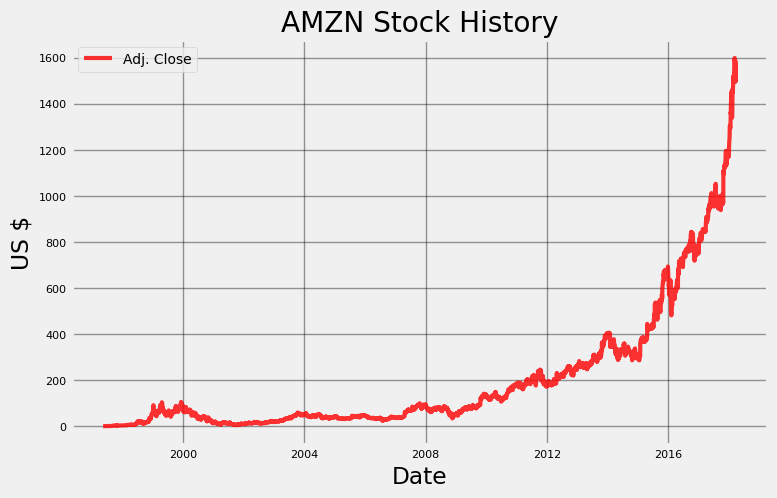

In [5]:
amazon.plot_stock()

Maximum Daily Change = 26.98 on 2016-01-28 00:00:00.
Minimum Daily Change = -49.57 on 2015-07-24 00:00:00.
Current Daily Change = -75.35 on 2018-03-27 00:00:00.

Maximum Adj. Volume = 104329200.00 on 2007-04-25 00:00:00.
Minimum Adj. Volume = 984400.00 on 2012-12-24 00:00:00.
Current Adj. Volume = 6793279.00 on 2018-03-27 00:00:00.



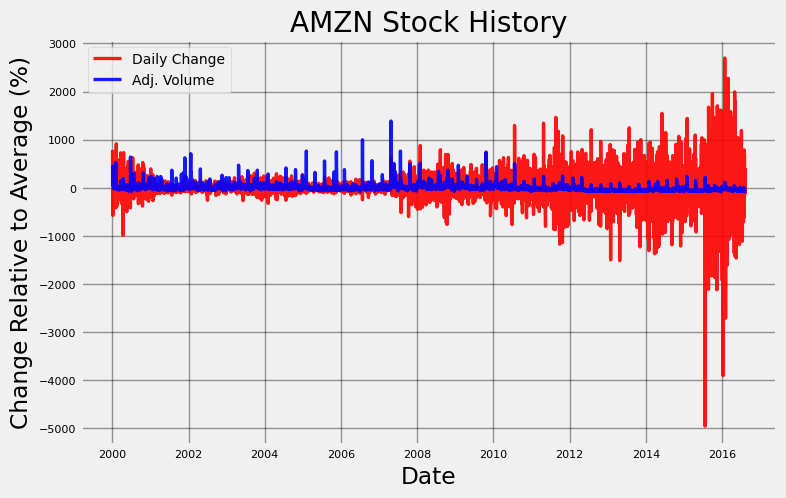

In [6]:
amazon.plot_stock(start_date = '2000-01-03',  end_date = '2016-08-13',  stats = ['Daily Change', 'Adj. Volume'],  plot_type='pct')

In [ ]:
!pip remove fbprophet
!pip install pystan==2.19.1.1
!pip install fbprophet

In [9]:
from fbprophet import Prophet
from fbprophet import Prophet
import logging
logger = logging.getLogger('fbprophet')
logger.setLevel(logging.DEBUG)

m = Prophet()
print(m.stan_backend)

DEBUG:fbprophet:Trying to load backend: PYSTAN
DEBUG:fbprophet:Loaded stan backend: PYSTAN


DEBUG:fbprophet:Trying to load backend: PYSTAN
DEBUG:fbprophet:Loaded stan backend: PYSTAN


Predicted Price on 2018-06-25 00:00:00 = $1885.23


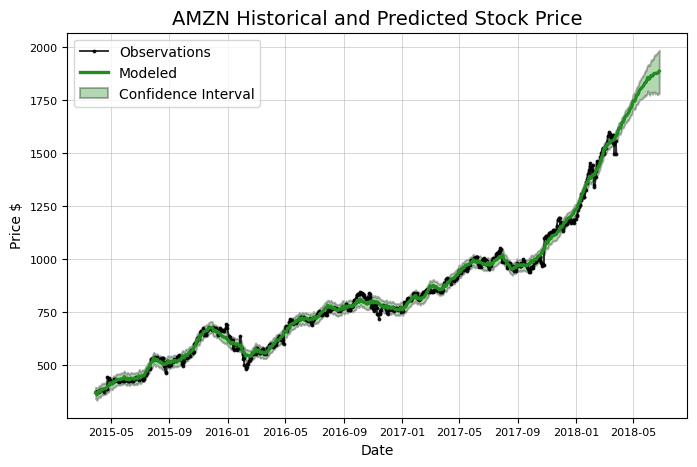

In [11]:
model, model_data = amazon.create_prophet_model(days=90)

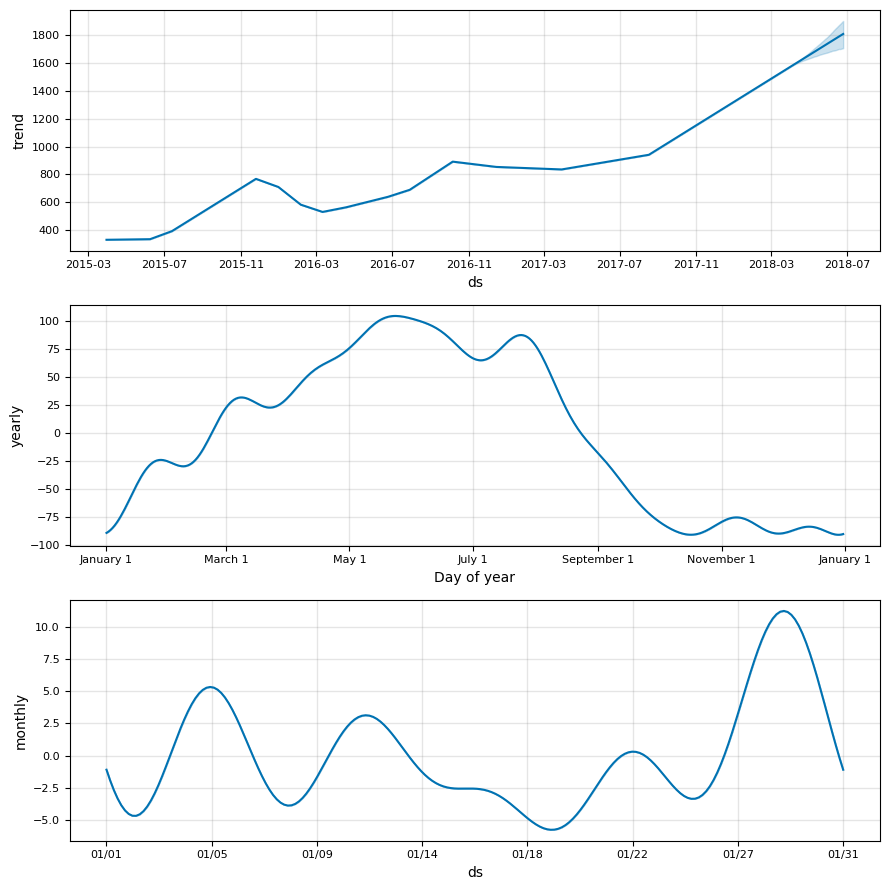

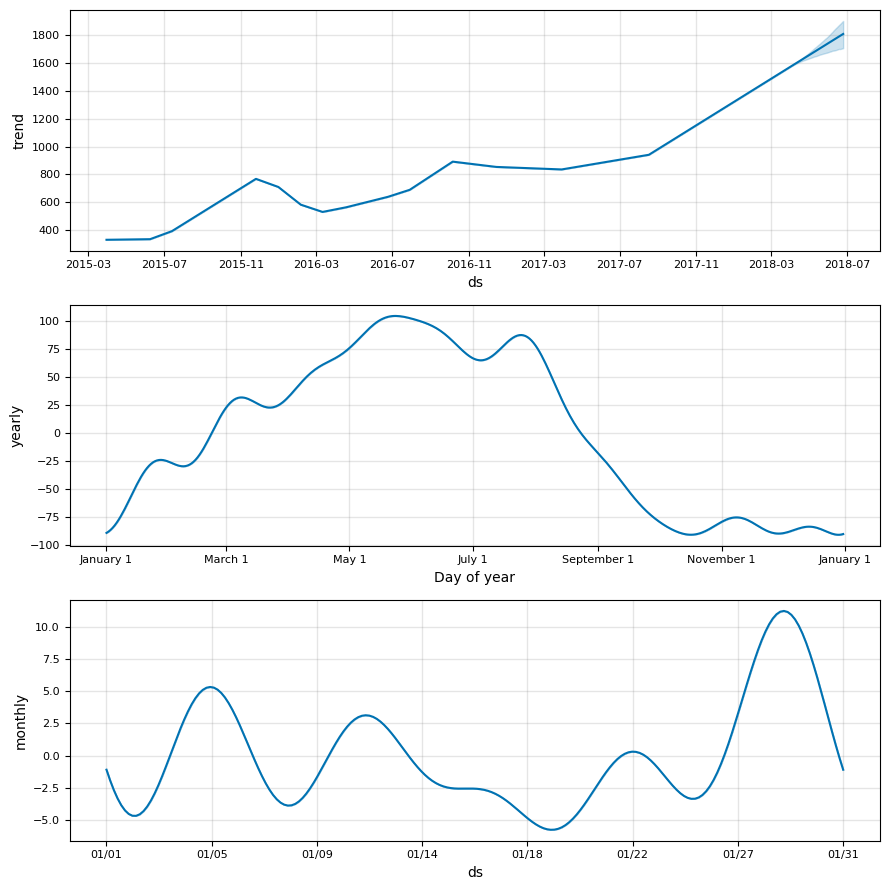

In [15]:
# model and model_data are from previous method call
model.plot_components(model_data)
#plt.show()

#Considering the Weekly seasonality

In [14]:
print(amazon.weekly_seasonality)
amazon.weekly_seasonality = True
print(amazon.weekly_seasonality)

False
True


#for finding the chainging points

DEBUG:fbprophet:Trying to load backend: PYSTAN
DEBUG:fbprophet:Loaded stan backend: PYSTAN



Changepoints sorted by slope rate of change (2nd derivative):

          Date  Adj. Close     delta
168 2015-11-25      675.34 -3.028819
385 2016-10-06      841.66 -2.338912
240 2016-03-11      569.61  1.590614
216 2016-02-05      502.13  1.417665
601 2017-08-17      960.57  1.367959


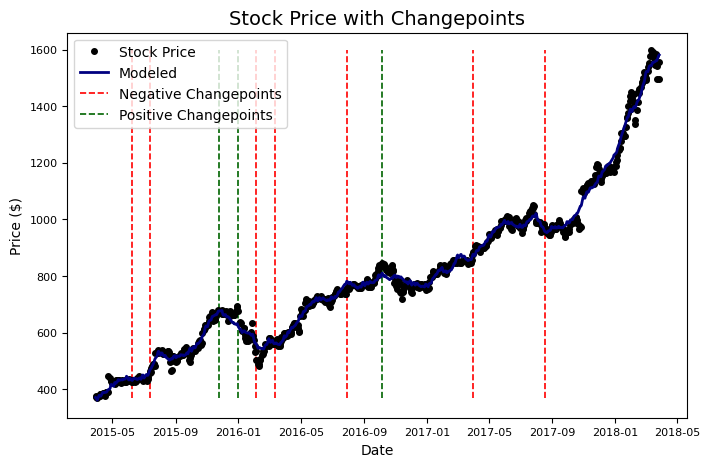

In [16]:
amazon.changepoint_date_analysis()

DEBUG:fbprophet:Trying to load backend: PYSTAN
DEBUG:fbprophet:Loaded stan backend: PYSTAN



Prediction Range: 2017-03-27 00:00:00 to 2018-03-27 00:00:00.

Predicted price on 2018-03-24 00:00:00 = $1054.31.
Actual price on    2018-03-23 00:00:00 = $1495.56.

Average Absolute Error on Training Data = $16.91.
Average Absolute Error on Testing  Data = $138.59.

When the model predicted an increase, the price increased 56.41% of the time.
When the model predicted a  decrease, the price decreased  40.22% of the time.

The actual value was within the 80% confidence interval 59.44% of the time.


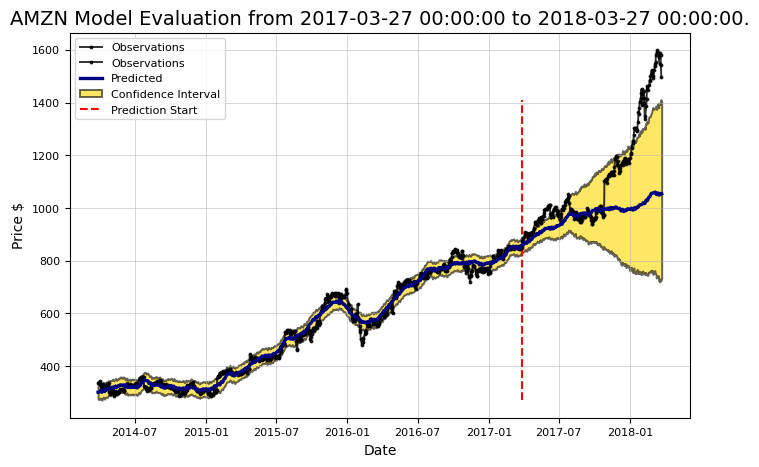

In [21]:
amazon.evaluate_prediction()

Since the prediction is not good this is because we are using the default parameters for that but we can try improving it by hyperparameter tunning i.e. by tweking the changepoints

In [22]:
#there are two methods for choosing the changepoints 
#visually and quantitatively

DEBUG:fbprophet:Trying to load backend: PYSTAN
DEBUG:fbprophet:Loaded stan backend: PYSTAN
DEBUG:fbprophet:Trying to load backend: PYSTAN
DEBUG:fbprophet:Loaded stan backend: PYSTAN
DEBUG:fbprophet:Trying to load backend: PYSTAN
DEBUG:fbprophet:Loaded stan backend: PYSTAN
DEBUG:fbprophet:Trying to load backend: PYSTAN
DEBUG:fbprophet:Loaded stan backend: PYSTAN


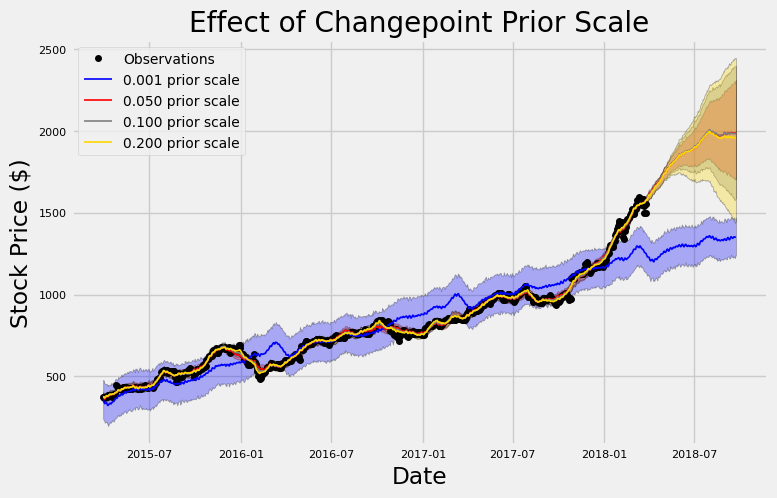

In [23]:
# changepoint priors is the list of changepoints to evaluate
amazon.changepoint_prior_analysis(changepoint_priors=[0.001, 0.05, 0.1, 0.2])

End Date exceeds data range
Enter a new end date: 2021-08-03


DEBUG:fbprophet:Trying to load backend: PYSTAN
DEBUG:fbprophet:Loaded stan backend: PYSTAN



Validation Range 2016-01-04 00:00:00 to 2018-03-27 00:00:00.



DEBUG:fbprophet:Trying to load backend: PYSTAN
DEBUG:fbprophet:Loaded stan backend: PYSTAN
DEBUG:fbprophet:Trying to load backend: PYSTAN
DEBUG:fbprophet:Loaded stan backend: PYSTAN
DEBUG:fbprophet:Trying to load backend: PYSTAN
DEBUG:fbprophet:Loaded stan backend: PYSTAN


     cps  train_err  train_range    test_err   test_range
0  0.001  44.476286   152.792114  287.900617   152.635951
1  0.050  11.288430    35.983154  187.053239   452.410197
2  0.100  10.693855    34.500179  186.505605   610.919421
3  0.200   9.787030    32.107099  153.634745  1078.279288


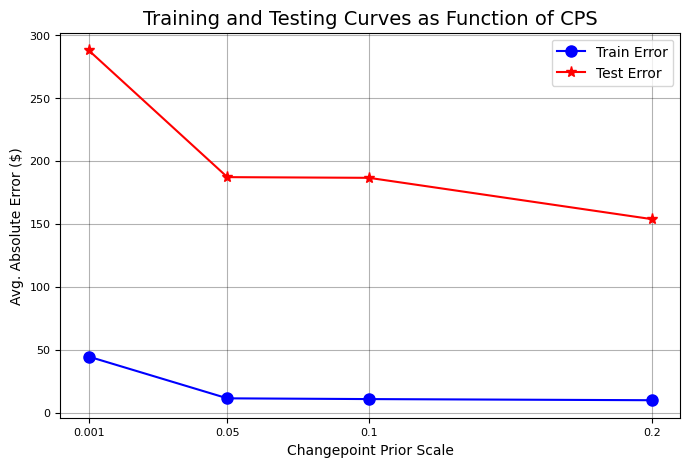

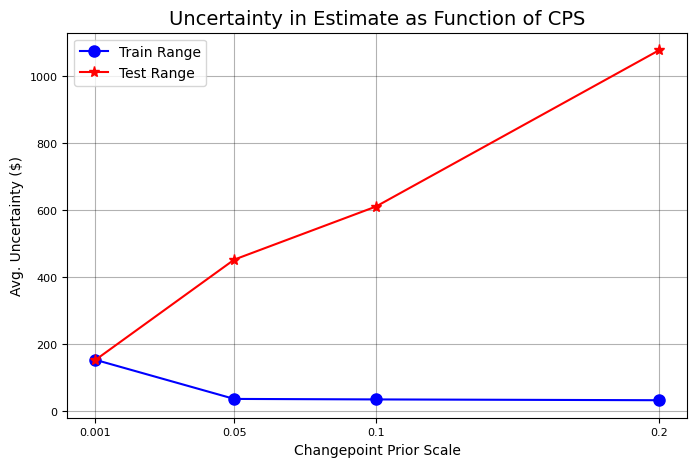

In [24]:
amazon.changepoint_prior_validation(start_date='2016-01-04', end_date='2021-01-03', changepoint_priors=[0.001, 0.05, 0.1, 0.2])

DEBUG:fbprophet:Trying to load backend: PYSTAN
DEBUG:fbprophet:Loaded stan backend: PYSTAN



Validation Range 2016-01-04 00:00:00 to 2017-01-03 00:00:00.



DEBUG:fbprophet:Trying to load backend: PYSTAN
DEBUG:fbprophet:Loaded stan backend: PYSTAN
DEBUG:fbprophet:Trying to load backend: PYSTAN
DEBUG:fbprophet:Loaded stan backend: PYSTAN
DEBUG:fbprophet:Trying to load backend: PYSTAN
DEBUG:fbprophet:Loaded stan backend: PYSTAN
DEBUG:fbprophet:Trying to load backend: PYSTAN
DEBUG:fbprophet:Loaded stan backend: PYSTAN
DEBUG:fbprophet:Trying to load backend: PYSTAN
DEBUG:fbprophet:Loaded stan backend: PYSTAN


    cps  train_err  train_range    test_err  test_range
0  0.15  10.304711    33.506934  145.602815  228.318347
1  0.20   9.787030    32.100008  124.606299  314.204794
2  0.25   9.384264    30.988955  113.053761  429.724387
3  0.40   8.731857    29.219116   83.927227  688.318660
4  0.50   8.392331    28.379720   70.764659  877.486991
5  0.60   8.238658    27.975776   70.436959  978.800937


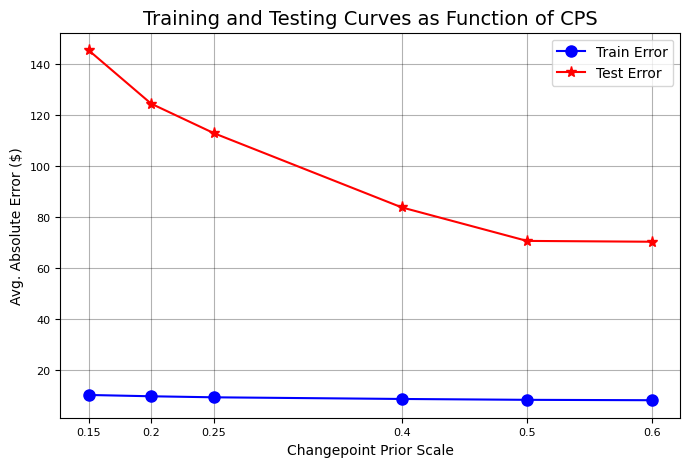

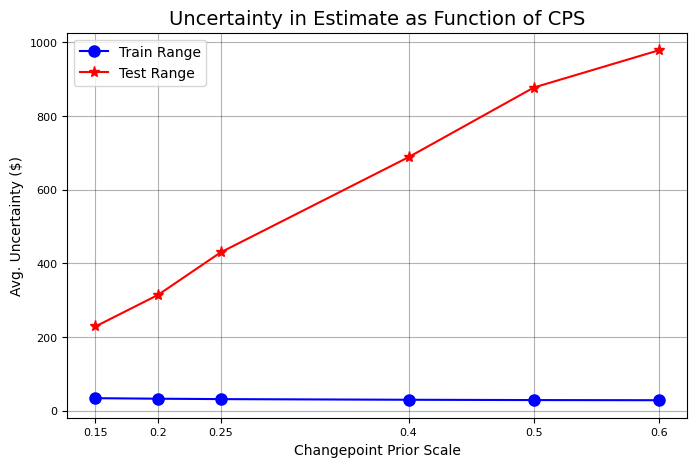

In [25]:
# test more changepoint priors on same validation range
amazon.changepoint_prior_validation(start_date='2016-01-04', end_date='2017-01-03', changepoint_priors=[0.15, 0.2, 0.25,0.4, 0.5, 0.6])

DEBUG:fbprophet:Trying to load backend: PYSTAN
DEBUG:fbprophet:Loaded stan backend: PYSTAN



Prediction Range: 2017-03-27 00:00:00 to 2018-03-27 00:00:00.

Predicted price on 2018-03-24 00:00:00 = $984.24.
Actual price on    2018-03-23 00:00:00 = $1495.56.

Average Absolute Error on Training Data = $10.72.
Average Absolute Error on Testing  Data = $189.05.

When the model predicted an increase, the price increased 61.22% of the time.
When the model predicted a  decrease, the price decreased  47.52% of the time.

The actual value was within the 80% confidence interval 83.53% of the time.


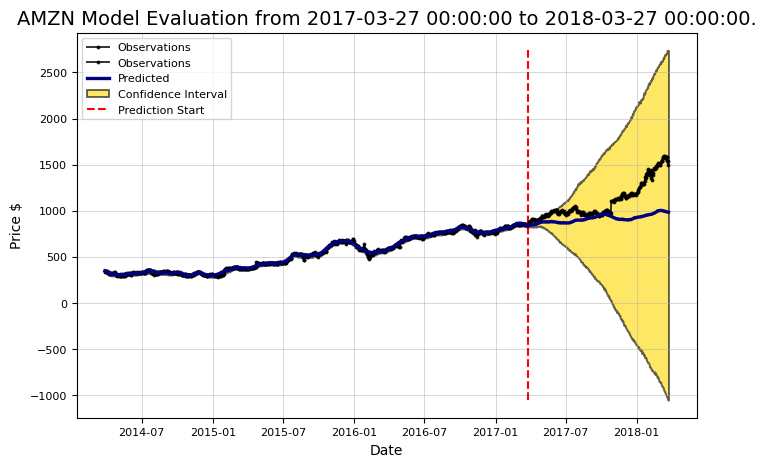

In [26]:
amazon.evaluate_prediction()

DEBUG:fbprophet:Trying to load backend: PYSTAN
DEBUG:fbprophet:Loaded stan backend: PYSTAN



Predicted Increase: 

         Date     estimate     change        upper        lower
1  2018-03-28  1574.483406   2.061908  1595.963100  1552.974656
2  2018-03-29  1578.242557   3.759151  1599.908769  1556.734979
3  2018-03-30  1584.714450   6.471893  1605.262419  1561.785661
5  2018-04-01  1597.806467  13.092017  1618.109497  1574.760420
6  2018-04-02  1599.549740   1.743272  1620.102555  1578.714277
8  2018-04-04  1599.058870   0.237018  1621.270140  1578.407019
9  2018-04-05  1602.845764   3.786894  1625.007946  1578.549318
10 2018-04-06  1609.673449   6.827685  1631.956336  1586.290854

Predicted Decrease: 

        Date     estimate    change       upper       lower
7 2018-04-03  1598.821852 -0.727888  1620.53434  1576.69785


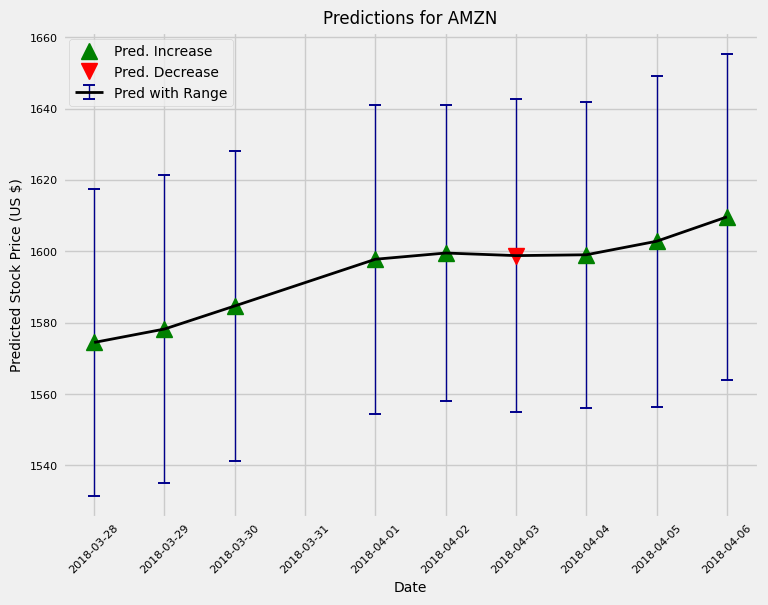

DEBUG:fbprophet:Trying to load backend: PYSTAN
DEBUG:fbprophet:Loaded stan backend: PYSTAN



Predicted Increase: 

         Date     estimate     change        upper        lower
1  2018-03-28  1574.483406   2.061908  1595.105655  1553.805407
2  2018-03-29  1578.242557   3.759151  1599.982981  1556.016321
3  2018-03-30  1584.714450   6.471893  1606.395077  1564.711976
5  2018-04-01  1597.806467  13.092017  1620.802882  1576.381461
6  2018-04-02  1599.549740   1.743272  1621.698493  1577.006578
..        ...          ...        ...          ...          ...
91 2018-06-26  1813.297021   1.227819  2022.883009  1589.084479
93 2018-06-28  1813.095123   0.119017  2025.343365  1583.353893
94 2018-06-29  1815.638458   2.543335  2026.782471  1575.585223
96 2018-07-01  1824.657209   9.018751  2045.663655  1580.094782
97 2018-07-02  1825.773129   1.115920  2041.739755  1578.838861

[73 rows x 5 columns]

Predicted Decrease: 

          Date     estimate    change        upper        lower
7   2018-04-03  1598.821852 -0.727888  1620.160703  1577.686729
38  2018-05-04  1707.860969 -0.7604

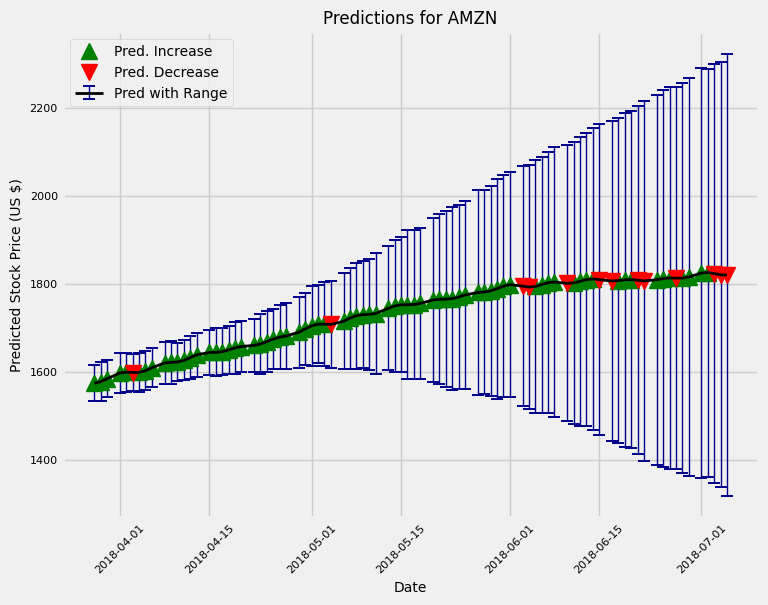

In [27]:
amazon.predict_future(days=10)
amazon.predict_future(days=100)